Should we use constituents provided by NOAA/CHS or constituents derived from a ttide harmonic analysis?

In [1]:
from nowcast import residuals, figures
import datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# CHS vs ttide

Can't do Nanaimo because no archives

ttides from 2008 time series harmonic analysis.

In [2]:
chs_path = '/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/tidal_predictions/'
SITES = figures.SITES
stations = ['Point Atkinson', 'Campbell River', 'Victoria']
ttide_path = '/data/nsoontie/MEOPAR/analysis/storm_surges/data/'


In [3]:
sdt=datetime.datetime(2015,1,1)
edt=datetime.datetime(2015,10,31)

obs = {}
chs_tides={}
chs_res = {}
ttide_tides={}
ttide_res = {}
for name in stations:
    obs[name] = figures.load_archived_observations(name,
                                                   sdt.strftime('%d-%b-%Y'),
                                                   edt.strftime('%d-%b-%Y'))
    chs_tides[name] = figures.get_tides(name, path=chs_path)
    ttide_tides[name] = figures.get_tides(name,path=ttide_path)
    
    ssh = obs[name].wlev - figures.SITES[name]['msl']
    time = obs[name].time
    chs_res[name] = figures.compute_residual(np.array(ssh), np.array(time), chs_tides[name])
    ttide_res[name] = figures.compute_residual(np.array(ssh), np.array(time), ttide_tides[name]) 

Plot power spectrum

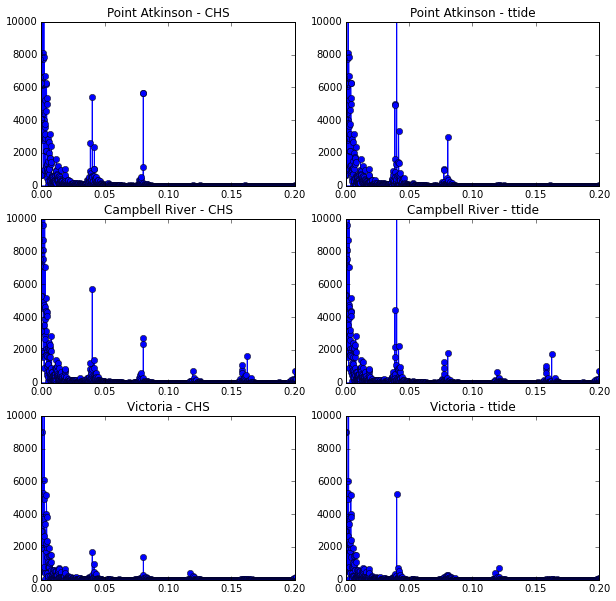

In [4]:
fig,axs=plt.subplots(3,2,figsize=(10,10))
types = ['CHS', 'ttide']
for i, res in enumerate([chs_res, ttide_res]):
    ax_c = axs[:,i]
    for name,ax in zip(stations, ax_c):
    
        tmp_array =np.array(res[name])
        tmp = tmp_array[~np.isnan(tmp_array)]
        ps = np.abs(np.fft.fft((tmp)))**2
        freqs = np.fft.fftfreq(tmp.size, 1)
    
        ax.plot(freqs,ps,'o-')
        ax.set_title('{} - {}'.format(name, types[i]))
        ax.set_xlim([0,.2])
        ax.set_ylim([0,1e4])

ttide- diurnal higher but semi-diurnal lower...